<div>
    <img src="logo_DH.png"/>
<div>

## Data Science 2021 - Grupo 1 - Trabajo Práctico 3 - Clasificación de Asteroides

<div>
    <img src="cneos_banner.png"/>
<div>

### Integrantes:
- Raúl Bravo, raedbravo@gmail.com
- Ricardo Climent, rickcliment@gmail.com
- Gustavo Escandarani, gustavo@escandarani.com.ar
- Paula Marenco, paula.marenco@gmail.com
- Humberto Ofria, hofria@gmail.com
- Manuel Rodríguez, manuel.f.rodriguez@gmail.com
- Leandro Scquizzato, lscquizzato@gmail.com
- Martín Urbani, marurbani@hotmail.com

---

### Objetivo: predecir si un evento de aproximación de asteroide es peligroso o no.
#### Basándonos en un dataset de Objetos Cercanos a la Tierra (NEOs) obtenido del Jet Propulsion Lab (JPL) de la NASA.

#### Links:
- https://towardsdatascience.com/nasa-asteroid-classification-6949bda3b1da
- https://www.kaggle.com/shrutimehta/nasa-asteroids-classification
- https://cneos.jpl.nasa.gov/

---

### Campos del Dataset

#### Datos del Asteroide
- **Neo Reference ID** - ID de referencia otorgado por la NASA al asteroide o cometa cercano a la Tierra (Near Earth Object, NEO)
- **Name** - 'Nombre' del asteroide (en este dataset viene con la misma información que el campo anterior NEO Reference ID)
* **Absolute Magnitude** - La magnitud absoluta es una medida de la luminosidad/brillo del asteroide bajo ciertos parámetros estándar de distancia y ángulo de observación
* **Est Dia in (in KM, M, Miles, and Feet) (min)** - Diámetro estimado mínimo del asteroide (en distintas unidades de medida)
* **Est Dia in (in KM, M, Miles, and Feet) (max)** - Diámetro estimado máximo del asteroide (en distintas unidades de medida)

#### Datos de la aproximación
* **Close Approach Date** - Fecha de aproximación a la Tierra del asteroide en la que se midieron algunos de los parámetros
* **Epoch Date Close Approach** - Fecha de aproximación a la Tierra del asteroide (en formato "epoch": segundos transcurridos desde cierto punto de referencia)
* **Relative Velocity (in km per sec, km per hr, and miles per hour)** - Velocidad relativa a la Tierra (en varias unidades de medida)
* **Miss Dist.(in Astronomical, lunar, km, and miles)** - Distancia a la que pasó de la Tierra (en varias unidades de medida)
* **Orbiting Body** - Los asteroides orbitan todos alrededor del Sol, en este caso este campo se indica contra qué cuerpo se obtuvieron los valores anteriores de velocidad y distancia (la Tierra)

#### Datos de la órbita
* **Orbit ID** - ID de solución utilizada por la NASA para determinar la órbita del asteroide (un valor interno de la NASA)
* **Orbit Determination Date** - Fecha y hora en la que la órbita del asteroide fué determinada/calculada
* **Orbit Uncertainity** - Medida de "incertidumbre" de la órbita calculada (de 0 a 9)
* **Minimum Orbit Intersection** - Distancia mínima entre las órbitas de la Tierra y del Asteroide (en Unidades Astronómicas)
* **Jupiter Tisserand Invariant** -  Valor utilizado para diferenciar asteroides de cometas (cometas de la "Familia de Júpiter")
* **Epoch Osculation** - Fecha hora Tiempo (en formato "epoch") en la cual se midieron la posición y velocidad del asteroide para calcular su órbita

#### Parámetros de la órbita
* **Eccentricity** - Valor que especifica cuánto se desvía la órbita (que es siempre una elipse) de un círculo perfecto
* **Semi Major Axis** - Semieje mayor de la órbita elíptica (la mitad del diámetro máximo de la elipse)
* **Inclination** - Inclinación de la órbita del asteroide respecto del plano de la órbita de la Tierra                  
* **Asc Node Longitude** - Ángulo trazado sobre el plano de la órbita de la Tierra entre un punto de referencia y la línea que pasa por el nodo de ascención del asteroide
* **Orbital Period** - Período orbital, tiempo en el que el asteroide completa una vuelta alrededor del Sol
* **Perihelion Distance** - Distancia al Sol del punto más cercano de la órbita (Perihelio)
* **Perihelion Arg** - Ángulo trazado sobre el plano de la órbita del asteroide, entre el nodo  de ascención (cuando el asteroide cruza el plano orbital de la tierra) y el perihelio
* **Aphelion Dist** - Distancia al Sol del punto más lejano de la órbita (Afelio)
* **Perihelion Time** - Longitud de tiempo del pasaje del asteroide por la etapa de perihelio
* **Mean Anomaly** - Producto entre el movimiento medio (Mean Motion) y el tiempo de pasaje por el perihelio
* **Mean Motion** - Velocidad angular requerida por el asteroide para orbitar (se deriva  del período orbital y de la longitud del semieje mayor)
* **Equinox** - Sistema de coordenadas de referencia utilizado (el estándar actual es 'J2000')

#### Variable Target
* **Hazardous** - Asteroide peligroso (True / False)  

---

## Imports de Librerías

In [1]:
# Librerías básicos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Librerías de Sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn import metrics

# Librerías adicionales
from boruta import BorutaPy
import shap

In [2]:
# Seteos globales de warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# Opción de Pandas para visualizar todas las columnas
pd.set_option('display.max_columns', None)

In [3]:
# Librería con funciones propias
import myDS as my

---

## Funciones

### Función para evaluar resultados

In [4]:
# Evaluation function
def evaluation(y_true, y_pred, y_proba=[], verbose=0):
    
    if verbose == 1:
        # Print Accuracy, Recall, F1 Score, and Precision metrics.
        print('Evaluation Metrics:')
        print('Accuracy:   ' + str(metrics.accuracy_score(y_true, y_pred)))
        print('Recall:     ' + str(metrics.recall_score(y_true, y_pred)))
        print('F1 Score:   ' + str(metrics.f1_score(y_true, y_pred)))
        print('Precision:  ' + str(metrics.precision_score(y_true, y_pred)))
        if y_proba == []:
            print('ROC_AUC:    ' + str(metrics.roc_auc_score(y_true, y_pred)))
        else:
            print('ROC_AUC:    ' + str(metrics.roc_auc_score(y_true, y_proba)))
            
        #print('MAE = {}'.format(metrics.mean_absolute_error(y_true, y_pred)))
        #print('RMSD = {}'.format(np.sqrt(metrics.mean_squared_error(y_true, y_pred))))
        
        # Print Confusion Matrix
        print('\nConfusion Matrix:')
        print('   TN   FP   FN   TP')
        conf_mat = metrics.confusion_matrix(y_true, y_pred)
        print(conf_mat.ravel())
        print()
        conf_mat_df = pd.DataFrame(data=conf_mat,
                                   index=['Actual Negative: 0', 'Actual Positive: 1'],
                                   columns=['Predict Negative: 0', 'Predict Positive: 1'])
        
        sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='YlGnBu');
                
    Accuracy = metrics.accuracy_score(y_true, y_pred).round(3)
    Recall = metrics.recall_score(y_true, y_pred).round(3)
    F1_Score = metrics.f1_score(y_true, y_pred).round(3)
    Precision = metrics.precision_score(y_true, y_pred).round(3)
    if y_proba == []:
        Roc_auc = metrics.roc_auc_score(y_true, y_pred).round(3)        
    else:
        Roc_auc = metrics.roc_auc_score(y_true, y_proba).round(3)
        
    #MAE = metrics.mean_absolute_error(y_true, y_pred).round(3)
    #RMSD = metrics.mean_squared_error(y_true, y_pred).round(3)
    
    final = []
    final.append(Accuracy)
    final.append(Recall)
    final.append(F1_Score)
    final.append(Precision)
    final.append(Roc_auc)
    #final.append(MAE)
    #final.append(RMSD)
    cm = metrics.confusion_matrix(y_true, y_pred)
    for t in cm[0]:
        final.append(t)
    for t in cm[1]:
        final.append(t)
    
    return final

### Función Limpieza de Ouliers, devuelve un array de bool con los "no outliers"


In [5]:
# Función para remover outliers, datapd es el array de panda y columna es la columna de la que queremos retirar los outliers.
# Está medio copiado de la clase 12, con el agregado de la posibilidad de pasarle dos valores extremos, un max y un min como
# límites de descarte de datos, elimina mayores que max y menores que min.
# Devuelve array con bool de los no outliers
# Parámetros
# datapd: dataset de pandas 
# columna: columna del dataset
# hab_Q3Q1: Si es False no ejecuta lógica de Cuartiles, Si es True la ejecuta
# max: el valor máximo de la columna
# min: el valor mínimo de la columna
# El max y el min los considera tanto si hab_Q3Q1 es True como False

def remover_outliers(datapd, columna, hab_Q3Q1=False, max=100000.0, min=0.0):
    
    if hab_Q3Q1 == True:
        q1 = datapd[columna].quantile(0.25)
        #print('q1:', q1.round(2))
        q2 = datapd[columna].quantile(0.5)
        #print('q2:', q2.round(2))
        q3 = datapd[columna].quantile(0.75)
        #print('q3:', q3.round(2))
        iqr = (q3 - q1.round(2)) * 4 #!!! OJO CAMBIADO este valor de 1.5 !!!
        up_threshold = q3 + iqr
        low_threshold = q1 - iqr
        if low_threshold < min:
            low_threshold = min
        if up_threshold > max:
            up_threshold = max
    if hab_Q3Q1 != True:
        low_threshold = min
        up_threshold = max
    
    
    #print('up_threshold:', round(up_threshold,2))
    #print('low_threshold:', round(low_threshold,2))
    outlier_mask_up = datapd[columna] > up_threshold
    outlier_mask_down = datapd[columna] < low_threshold
    outlier_mask = np.logical_or(outlier_mask_up, outlier_mask_down)
    not_outliers = np.logical_not(outlier_mask)
    #data_pd_sin_outliers = datapd[not_outliers]
    #return data_pd_sin_outliers
    return not_outliers

### Función para listar correlaciones mayores a cierto umbral

In [6]:
# Función para listar correlaciones > umbral
# recibe el dataframe
# devuelve una lista
def lista_correlacion(df1, umbral=0.9):
    final = []
    flag = 1
    data_cor1 = df1.corr()
    for c in data_cor1.columns:
        for r in data_cor1.index:
            if r != c:
                if abs(data_cor1.loc[r, c]) > abs(umbral):
                    flag = 0
                    final.append([r, c, data_cor1.loc[r, c].round(3)])
                    #print(r, '-', c, ' - Corr: ', data_cor1.loc[r, c].round(3))
    if flag == 1:
        print('No hay correlaciones altas')
    return final

---

## Dataset

### Carga y exploración

In [7]:
# Import dataset
df = pd.read_csv('nasa.csv')

# Print the shape of the dataset
print(df.shape)

# Select top of the dataset
df.head()

(4687, 40)


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


### Tipos de datos

In [8]:
df.dtypes

Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date              object
Epoch Date Close Approach         int64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbiting Body                    object
Orbit ID                          int64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64


### Nulos (no hay)

In [9]:
df.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

### Duplicados (no hay)

In [10]:
# No se encontraron duplicados
df.duplicated().sum()

0

---

## Columnas - Features

In [11]:
# Convierte la columna target de True/False a 1/0
df['Hazardous'] = df['Hazardous'].apply(lambda x: 1 if x == True else 0)

In [12]:
# Drop de columnas por datos repetidas o indicativas
df.drop(columns=['Neo Reference ID',              # ID del Asteroide, únicamente indicativo
                 'Name',                          # Nombre del Asteroide, únicamente indicativo
                 'Est Dia in KM(min)',            # Columna repetida con otra unidad de medida
                 'Est Dia in KM(max)',            # Columna repetida con otra unidad de medida
                 'Est Dia in Miles(min)',         # Columna repetida con otra unidad de medida
                 'Est Dia in Miles(min)',         # Columna repetida con otra unidad de medida
                 'Est Dia in Miles(max)',         # Columna repetida con otra unidad de medida
                 'Est Dia in Feet(min)',          # Columna repetida con otra unidad de medida
                 'Est Dia in Feet(max)',          # Columna repetida con otra unidad de medida
                 'Close Approach Date',           # Fecha de la Aproximación, no es relevante
                 'Epoch Date Close Approach',     # Fecha de la Aproximación, no es relevante
                 'Relative Velocity km per hr',   # Columna repetida con otra unidad de medida
                 'Miles per hour',                # Columna repetida con otra unidad de medida
                 'Miss Dist.(Astronomical)',      # Columna repetida con otra unidad de medida
                 'Miss Dist.(lunar)',             # Columna repetida con otra unidad de medida
                 'Miss Dist.(miles)',             # Columna repetida con otra unidad de medida
                 'Orbiting Body',                 # Un único valor: 'EARTH'
                 'Orbit ID',                      # ID interno de la NASA, es sólo una referencia
                 'Orbit Determination Date',      # Fecha de cálculo de la órbita, no es relevante
                 'Equinox'                        # Un único valor: 'J2000'
                ], inplace=True)

In [13]:
df

,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.600,127.219879,284.472297,6.115834,6.275369e+07,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.300,146.067964,326.617897,18.113985,5.729815e+07,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0
2,20.300,231.502122,517.654482,7.590711,7.622912e+06,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,1
3,27.400,8.801465,19.680675,11.173874,4.268362e+07,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,0
4,21.600,127.219879,284.472297,9.840831,6.101082e+07,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,44.111820,98.637028,22.154265,6.187511e+06,8,0.019777,5.156,2457637.5,0.361512,1.161429,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,0
4683,28.200,6.089126,13.615700,3.225150,9.677324e+05,6,0.006451,5.742,2458000.5,0.073200,1.075134,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,0
4684,22.700,76.657557,171.411509,7.191642,9.126775e+06,6,0.059973,4.410,2458000.5,0.368055,1.528234,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,0
4685,21.800,116.025908,259.441818,11.352090,3.900908e+07,5,0.177510,4.477,2458000.5,0.202565,1.486600,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Absolute Magnitude            4687 non-null   float64
 1   Est Dia in M(min)             4687 non-null   float64
 2   Est Dia in M(max)             4687 non-null   float64
 3   Relative Velocity km per sec  4687 non-null   float64
 4   Miss Dist.(kilometers)        4687 non-null   float64
 5   Orbit Uncertainity            4687 non-null   int64  
 6   Minimum Orbit Intersection    4687 non-null   float64
 7   Jupiter Tisserand Invariant   4687 non-null   float64
 8   Epoch Osculation              4687 non-null   float64
 9   Eccentricity                  4687 non-null   float64
 10  Semi Major Axis               4687 non-null   float64
 11  Inclination                   4687 non-null   float64
 12  Asc Node Longitude            4687 non-null   float64
 13  Orb

### Gráficos de features
#### (se limpian un poco antes para que se vean mejor, en un DataFrame aparte)

In [15]:
# Esta generacion de X e Y es solo para los gráficos al igual que la limpieza.
X = df.drop(columns=['Hazardous'])
Y = df.Hazardous

dfp = []
for columns in X:
    dfx = remover_outliers(df, columns, hab_Q3Q1=True, max=100e+12, min=0.0)
    print('{0:30} -  Cant. de outliers = {1}'.format(columns, df.shape[0] - dfx.sum()))
    dfp.append(dfx)

len(dfp[0])

Absolute Magnitude             -  Cant. de outliers = 0
Est Dia in M(min)              -  Cant. de outliers = 83
Est Dia in M(max)              -  Cant. de outliers = 83
Relative Velocity km per sec   -  Cant. de outliers = 0
Miss Dist.(kilometers)         -  Cant. de outliers = 0
Orbit Uncertainity             -  Cant. de outliers = 0
Minimum Orbit Intersection     -  Cant. de outliers = 0
Jupiter Tisserand Invariant    -  Cant. de outliers = 0
Epoch Osculation               -  Cant. de outliers = 639
Eccentricity                   -  Cant. de outliers = 0
Semi Major Axis                -  Cant. de outliers = 1
Inclination                    -  Cant. de outliers = 0
Asc Node Longitude             -  Cant. de outliers = 0
Orbital Period                 -  Cant. de outliers = 3
Perihelion Distance            -  Cant. de outliers = 0
Perihelion Arg                 -  Cant. de outliers = 0
Aphelion Dist                  -  Cant. de outliers = 1
Perihelion Time                -  Cant. de o

4687

In [16]:
outlier_maskp = np.ones(len(dfp[0]))
for t in dfp:
    outlier_maskp = np.logical_and(outlier_maskp, t)
    
outlier_maskp.sum()

3971

In [17]:
dfx_graph = X[outlier_maskp].copy()
dfy_graph = Y[outlier_maskp].copy()

In [18]:
dfx_graph

,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,21.600,127.219879,284.472297,6.115834,6.275369e+07,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551
1,21.300,146.067964,326.617897,18.113985,5.729815e+07,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330
2,20.300,231.502122,517.654482,7.590711,7.622912e+06,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371
3,27.400,8.801465,19.680675,11.173874,4.268362e+07,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277
4,21.600,127.219879,284.472297,9.840831,6.101082e+07,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4681,20.700,192.555078,430.566244,26.016058,2.506718e+07,1,0.121499,3.843,2458000.5,0.652899,1.706178,23.893424,145.035928,814.019755,0.592216,110.720210,2.820140,2.457597e+06,178.503886,0.442250
4683,28.200,6.089126,13.615700,3.225150,9.677324e+05,6,0.006451,5.742,2458000.5,0.073200,1.075134,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117
4684,22.700,76.657557,171.411509,7.191642,9.126775e+06,6,0.059973,4.410,2458000.5,0.368055,1.528234,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698
4685,21.800,116.025908,259.441818,11.352090,3.900908e+07,5,0.177510,4.477,2458000.5,0.202565,1.486600,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767


### Análisis de columnas del dataset

#### Los siguientes gráficos fueron pensados para observar el impacto sobre la peligrosidad de cada posible feature para modelar.

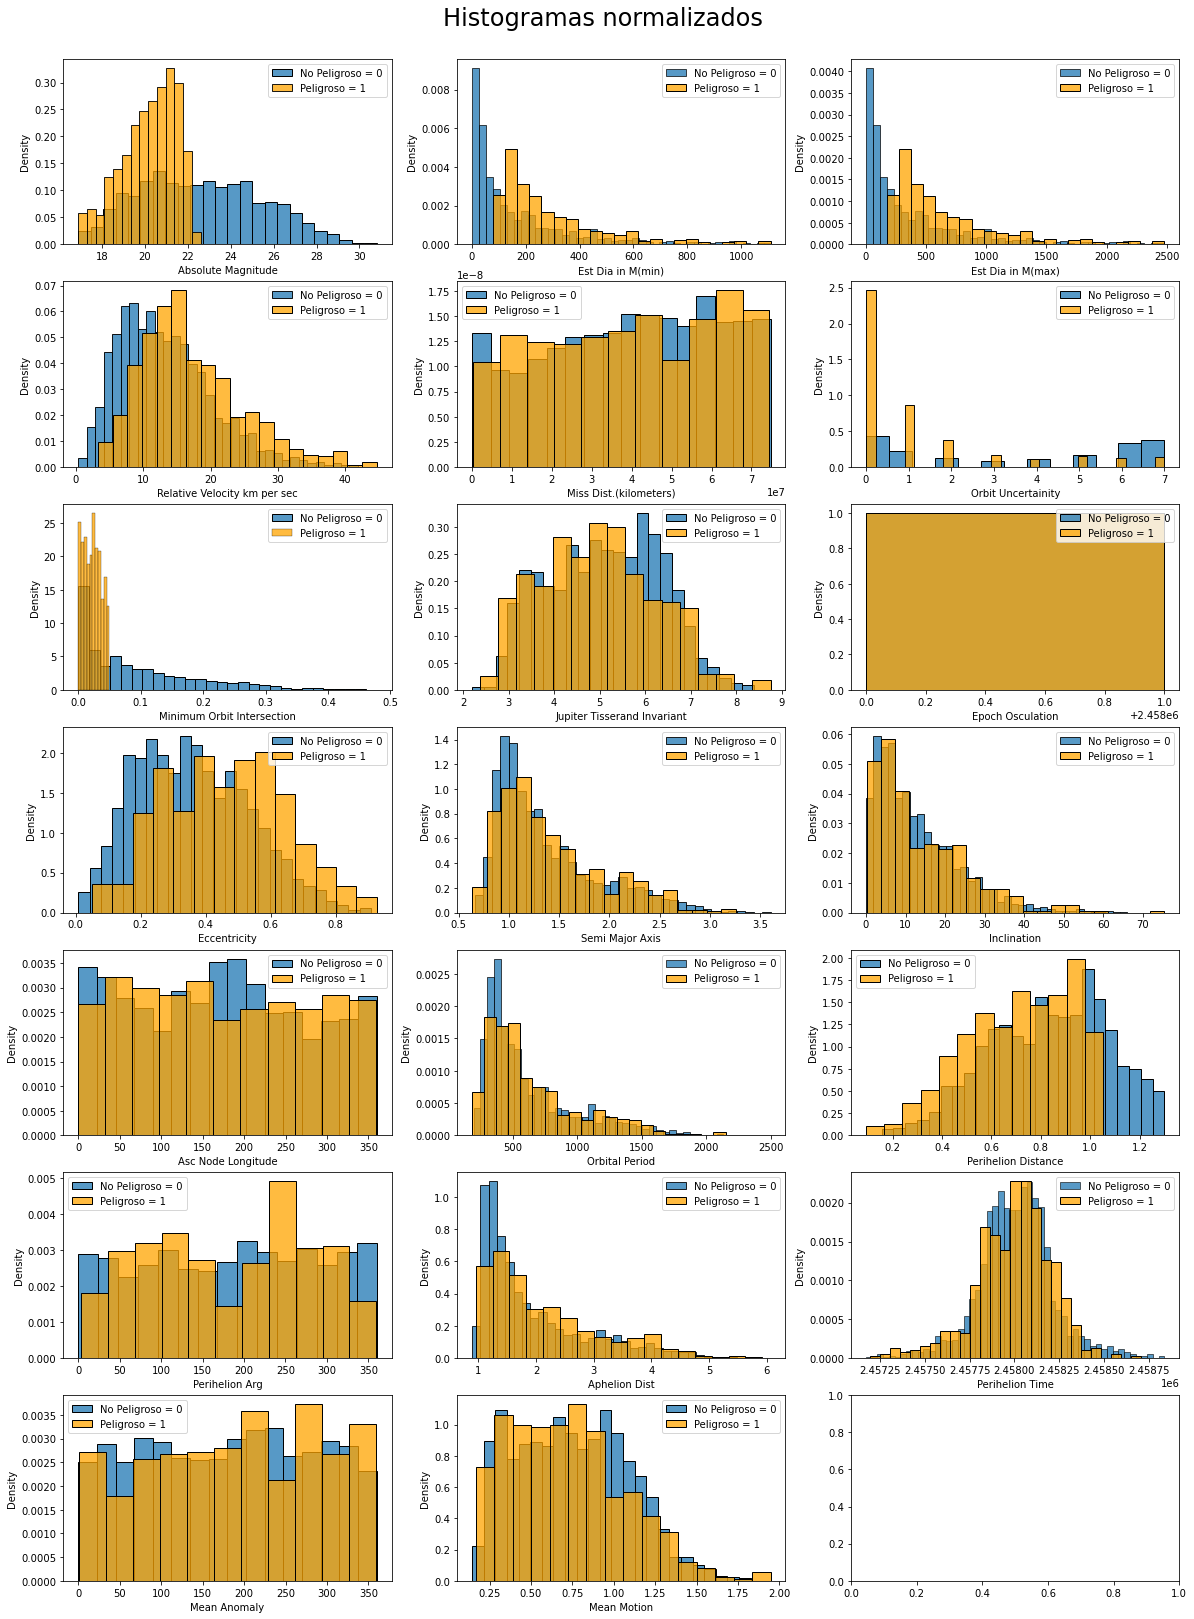

In [19]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(20, 28))
fig.suptitle('Histogramas normalizados', y=0.90, fontsize=24, va='center')
for c, ax in zip(dfx_graph.columns[:], axes.flatten()):
    sns.histplot(data=dfx_graph.loc[dfy_graph == 0, c].dropna(), stat='density', ax=ax, kde=False)
    sns.histplot(data=dfx_graph.loc[dfy_graph == 1, c].dropna(), stat='density', kde=False, ax=ax, color='orange')
    ax.legend(['No Peligroso = 0', 'Peligroso = 1'])

### Observaciones

#### - La peligrosidad aumenta conforme los campos _Relative Velocity_, _Eccentricity_, _Est Dia in M_ (min y max) y _Minimum Orbit Intersection_ suben.
#### - También es mayor cuando hay menor incertidumbre sobre la órbita (_Orbit Uncertainity_).
#### - Es notable como casi todos los eventos peligrosos están vinculados a _Absolute Magnitude_ menor o igual a 22, a _Perihelion distance_ menor o igual a 1, y a _Minimum Orbit Intersection_ menor o igual a 1.

#### - Si bien este análisis visual preliminar permite comprender la mayor o menor importancia de algunas features, en este proyecto utilizamos metodologías para seleccionar y descartar features relevantes que son más fiables que estas obervaciones visuales.



In [20]:
# Los gráficos muestran que 'Epoch Osculation' no suma, por lo que se dropea la columna.
df.drop(columns=['Epoch Osculation'], inplace=True)

### Prueba de selección de features con la Libreria Boruta

In [21]:
# Dividimos Test Train solo para el análisis de features, luego más adelante se vuelve a dividir para el modelo.
X = df.drop(columns=['Hazardous'])
Y = df.Hazardous
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1, test_size=.30, stratify=Y)

forest = RandomForestClassifier(max_depth=5)

# (Estas líneas tardan)
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=1, random_state=1, alpha=0.05, max_iter=50)
feat_selector.fit(np.array(X_train), np.array(y_train))


Iteration: 1 / 50
Iteration: 2 / 50
Iteration: 3 / 50
Iteration: 4 / 50
Iteration: 5 / 50
Iteration: 6 / 50
Iteration: 7 / 50
Iteration: 8 / 50
Iteration: 9 / 50
Iteration: 10 / 50
Iteration: 11 / 50
Iteration: 12 / 50
Iteration: 13 / 50
Iteration: 14 / 50
Iteration: 15 / 50
Iteration: 16 / 50
Iteration: 17 / 50
Iteration: 18 / 50
Iteration: 19 / 50
Iteration: 20 / 50
Iteration: 21 / 50
Iteration: 22 / 50
Iteration: 23 / 50
Iteration: 24 / 50
Iteration: 25 / 50
Iteration: 26 / 50
Iteration: 27 / 50
Iteration: 28 / 50
Iteration: 29 / 50
Iteration: 30 / 50
Iteration: 31 / 50
Iteration: 32 / 50
Iteration: 33 / 50
Iteration: 34 / 50
Iteration: 35 / 50
Iteration: 36 / 50
Iteration: 37 / 50
Iteration: 38 / 50
Iteration: 39 / 50
Iteration: 40 / 50
Iteration: 41 / 50
Iteration: 42 / 50
Iteration: 43 / 50
Iteration: 44 / 50
Iteration: 45 / 50
Iteration: 46 / 50
Iteration: 47 / 50
Iteration: 48 / 50
Iteration: 49 / 50


BorutaPy finished running.

Iteration: 	50 / 50
Confirmed: 	17
Tentative: 	0

BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=120,
                                          random_state=RandomState(MT19937) at 0x19E04691840),
         max_iter=50, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x19E04691840, verbose=1)

In [22]:
# Ranking de Resultados
f = pd.DataFrame(X_train.columns.tolist(), columns=['features'])
f['rank'] = feat_selector.ranking_
print(f.nsmallest(25, 'rank'))

                        features  rank
0             Absolute Magnitude     1
15                 Aphelion Dist     1
14                Perihelion Arg     1
13           Perihelion Distance     1
12                Orbital Period     1
10                   Inclination     1
17                  Mean Anomaly     1
8                   Eccentricity     1
9                Semi Major Axis     1
6     Minimum Orbit Intersection     1
5             Orbit Uncertainity     1
4         Miss Dist.(kilometers)     1
3   Relative Velocity km per sec     1
2              Est Dia in M(max)     1
1              Est Dia in M(min)     1
7    Jupiter Tisserand Invariant     1
18                   Mean Motion     1
16               Perihelion Time     2
11            Asc Node Longitude     3


### Boruta confirma 17 de las 19 features

In [23]:
# Dejamos solo las features extraídas de según los resultados de Boruta.
df.drop(columns=['Perihelion Time', 'Asc Node Longitude'], inplace=True)

In [24]:
df.shape

(4687, 18)

In [25]:
df.describe()

,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Eccentricity,Semi Major Axis,Inclination,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Mean Motion,Hazardous
count,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000
mean,22.267865,204.604203,457.508906,13.970811,3.841347e+07,3.516962,0.082320,5.056111,0.382569,1.400264,13.373844,635.582076,0.813383,183.932151,1.987144,181.167927,0.738242,0.161084
std,2.890972,369.573402,826.391249,7.293223,2.181110e+07,3.078307,0.090300,1.237818,0.180444,0.524154,10.936227,370.954727,0.242059,103.513035,0.951519,107.501623,0.342627,0.367647
min,11.160000,1.010543,2.259644,0.335504,2.660989e+04,0.000000,0.000002,2.196000,0.007522,0.615920,0.014513,176.557161,0.080744,0.006918,0.803765,0.003191,0.086285,0.000000
25%,20.100000,33.462237,74.823838,8.432865,1.995928e+07,0.000000,0.014585,4.049500,0.240858,1.000635,4.962341,365.605031,0.630834,95.625916,1.266059,87.006918,0.453289,0.000000
50%,21.900000,110.803882,247.765013,12.917889,3.964771e+07,3.000000,0.047365,5.071000,0.372450,1.240981,10.311836,504.947292,0.833153,189.761641,1.618195,185.718889,0.712946,0.000000
75%,24.500000,253.837029,567.596853,18.077649,5.746863e+07,6.000000,0.123593,6.019000,0.512411,1.678364,19.511681,794.195972,0.997227,271.777557,2.451171,276.531946,0.984669,0.000000
max,32.100000,15579.552413,34836.938254,44.633747,7.478160e+07,9.000000,0.477891,9.025000,0.960261,5.072008,75.406667,4172.231343,1.299832,359.993098,8.983852,359.917991,2.039000,1.000000


### Análisis de Correlación

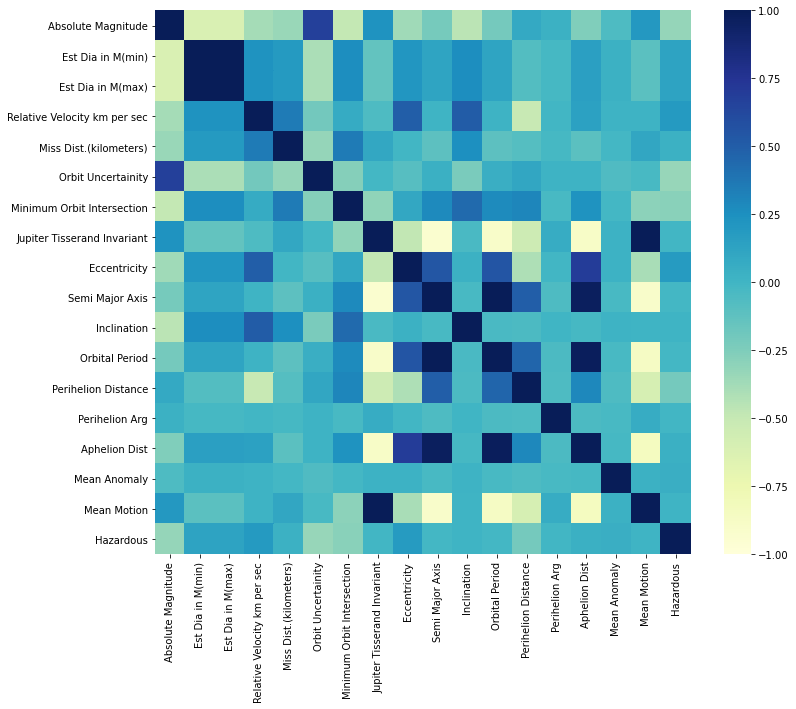

In [26]:
data_cor = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data_cor, vmin=-1, vmax=1, center=0, cmap='YlGnBu');

In [27]:
data_cor

,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Eccentricity,Semi Major Axis,Inclination,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Mean Motion,Hazardous
Absolute Magnitude,1.000000,-0.613482,-0.613482,-0.376853,-0.339117,0.677764,-0.488235,0.238702,-0.361359,-0.212437,-0.459632,-0.206774,0.086966,0.031784,-0.256169,-0.049401,0.195652,-0.325522
Est Dia in M(min),-0.613482,1.000000,1.000000,0.242141,0.188027,-0.399488,0.257904,-0.133582,0.216623,0.121224,0.259450,0.118314,-0.071866,-0.019577,0.151836,0.031455,-0.104350,0.132424
Est Dia in M(max),-0.613482,1.000000,1.000000,0.242141,0.188027,-0.399488,0.257904,-0.133582,0.216623,0.121224,0.259450,0.118314,-0.071866,-0.019577,0.151836,0.031455,-0.104350,0.132424
Relative Velocity km per sec,-0.376853,0.242141,0.242141,1.000000,0.351694,-0.202234,0.076306,-0.052294,0.495053,0.014351,0.514657,0.017961,-0.506978,-0.002913,0.144782,0.017685,0.022452,0.191970
Miss Dist.(kilometers),-0.339117,0.188027,0.188027,0.351694,1.000000,-0.326158,0.351981,0.093969,-0.005627,-0.112158,0.255828,-0.109888,-0.079937,-0.021483,-0.103231,-0.010157,0.104642,0.032407
Orbit Uncertainity,0.677764,-0.399488,-0.399488,-0.202234,-0.326158,1.000000,-0.267524,-0.008992,-0.088029,0.043902,-0.228806,0.047535,0.107946,0.016307,0.020908,-0.059396,-0.023776,-0.328721
Minimum Orbit Intersection,-0.488235,0.257904,0.257904,0.076306,0.351981,-0.267524,1.000000,-0.305849,0.093795,0.288947,0.439867,0.279885,0.299991,-0.029130,0.242023,-0.013336,-0.290538,-0.288949
Jupiter Tisserand Invariant,0.238702,-0.133582,-0.133582,-0.052294,0.093969,-0.008992,-0.305849,1.000000,-0.478341,-0.930103,-0.037366,-0.893517,-0.537884,0.064496,-0.887879,0.030972,0.992680,-0.003404
Eccentricity,-0.361359,0.216623,0.216623,0.495053,-0.005627,-0.088029,0.093795,-0.478341,1.000000,0.541271,0.039018,0.548521,-0.412612,-0.003210,0.701294,0.026161,-0.394860,0.183269
Semi Major Axis,-0.212437,0.121224,0.121224,0.014351,-0.112158,0.043902,0.288947,-0.930103,0.541271,1.000000,-0.030325,0.995248,0.496847,-0.048999,0.975326,-0.026319,-0.901396,-0.010770


In [28]:
#Función que lista correlación
aux = lista_correlacion(df, 0.8)
display(aux)

[['Est Dia in M(max)', 'Est Dia in M(min)', 1.0],
 ['Est Dia in M(min)', 'Est Dia in M(max)', 1.0],
 ['Semi Major Axis', 'Jupiter Tisserand Invariant', -0.93],
 ['Orbital Period', 'Jupiter Tisserand Invariant', -0.894],
 ['Aphelion Dist', 'Jupiter Tisserand Invariant', -0.888],
 ['Mean Motion', 'Jupiter Tisserand Invariant', 0.993],
 ['Jupiter Tisserand Invariant', 'Semi Major Axis', -0.93],
 ['Orbital Period', 'Semi Major Axis', 0.995],
 ['Aphelion Dist', 'Semi Major Axis', 0.975],
 ['Mean Motion', 'Semi Major Axis', -0.901],
 ['Jupiter Tisserand Invariant', 'Orbital Period', -0.894],
 ['Semi Major Axis', 'Orbital Period', 0.995],
 ['Aphelion Dist', 'Orbital Period', 0.978],
 ['Mean Motion', 'Orbital Period', -0.859],
 ['Jupiter Tisserand Invariant', 'Aphelion Dist', -0.888],
 ['Semi Major Axis', 'Aphelion Dist', 0.975],
 ['Orbital Period', 'Aphelion Dist', 0.978],
 ['Mean Motion', 'Aphelion Dist', -0.84],
 ['Jupiter Tisserand Invariant', 'Mean Motion', 0.993],
 ['Semi Major Axis', 'M

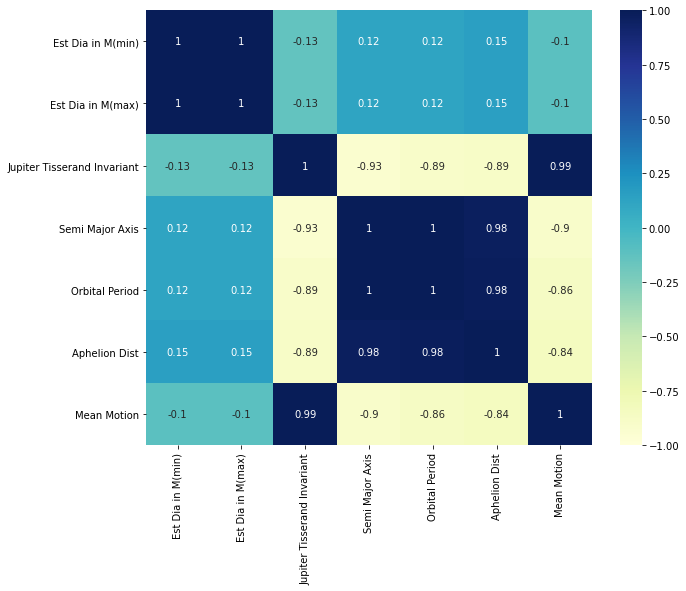

In [29]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(my.corr(df, greater_than=0.8), vmin=-1, vmax=1, annot=True, center=0, cmap='YlGnBu');

### Features a eliminar por alta correlación
- **Est Dia in M(min)** (dejamos **Est Dia in M(max)** que está más alta en el ranking Boruta)
- **Mean Motion** (dejamos **Jupiter Tisserand Invariant** que está más alta en el ranking Boruta)
- **Semi Major Axis** y **Orbital Period** (dejamos **Aphelion Dist** que está más alta en el ranking Boruta)

In [30]:
# Drop de las columnas 'Est Dia in M(min)', 'Mean Motion', 'Semi Major Axis', 'Orbital Period' por alta correlación
df.drop(columns=['Est Dia in M(min)', 'Mean Motion', 'Semi Major Axis', 'Orbital Period'], inplace=True)

In [31]:
aux = lista_correlacion(df, 0.8)
display(aux)

[['Aphelion Dist', 'Jupiter Tisserand Invariant', -0.888],
 ['Jupiter Tisserand Invariant', 'Aphelion Dist', -0.888]]

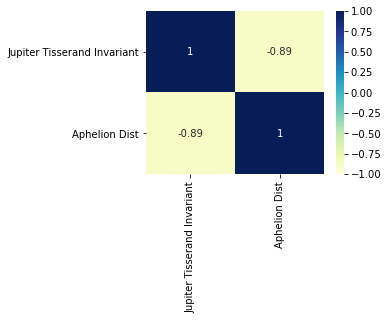

In [32]:
f, ax = plt.subplots(figsize=(4, 3))
sns.heatmap(my.corr(df, greater_than=0.8), vmin=-1, vmax=1, annot=True, center=0, cmap='YlGnBu');

### Features a eliminar por alta correlación (segunda ronda)
- **Jupiter Tisserand Invariant** (dejamos **Aphelion Dist** que está más alta en el ranking Boruta)

In [33]:
# drop 'Jupiter Tisserand Invariant' por alta correlación
df.drop(columns=['Jupiter Tisserand Invariant'],inplace=True)

In [34]:
df

,Absolute Magnitude,Est Dia in M(max),Relative Velocity km per sec,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Eccentricity,Inclination,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Hazardous
0,21.600,284.472297,6.115834,6.275369e+07,5,0.025282,0.425549,6.025981,0.808259,57.257470,2.005764,264.837533,1
1,21.300,326.617897,18.113985,5.729815e+07,3,0.186935,0.351674,28.412996,0.718200,313.091975,1.497352,173.741112,0
2,20.300,517.654482,7.590711,7.622912e+06,0,0.043058,0.348248,4.237961,0.950791,248.415038,1.966857,292.893654,1
3,27.400,19.680675,11.173874,4.268362e+07,6,0.005512,0.216578,7.905894,0.983902,18.707701,1.527904,68.741007,0
4,21.600,284.472297,9.840831,6.101082e+07,1,0.034798,0.210448,16.793382,0.967687,158.263596,1.483543,135.142133,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,23.900,98.637028,22.154265,6.187511e+06,8,0.019777,0.361512,39.880491,0.741558,276.395697,1.581299,304.306025,0
4683,28.200,13.615700,3.225150,9.677324e+05,6,0.006451,0.073200,5.360249,0.996434,42.111064,1.153835,282.978786,0
4684,22.700,171.411509,7.191642,9.126775e+06,6,0.059973,0.368055,4.405467,0.965760,274.692712,2.090708,203.501147,0
4685,21.800,259.441818,11.352090,3.900908e+07,5,0.177510,0.202565,21.080244,1.185467,180.346090,1.787733,203.524965,0


---

## Test Train Split

In [35]:
X = df.drop(columns=['Hazardous'])
Y = df.Hazardous

In [36]:
my.valCounts(Y)

,count,perc,cumsum,cum_perc
0,3932,83.9,3932,83.9
1,755,16.1,4687,100.0
< Null values >,0,0.0,4687,100.0


### Separamos utilizando stratify para preservar la proporción

In [37]:
#Separamos en Train y test, verificamos la proporción Test train
print(Y.value_counts(normalize=True))
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1, test_size=.30, stratify=Y)

0    0.838916
1    0.161084
Name: Hazardous, dtype: float64


### Verificamos la proporción

In [38]:
my.valCounts(y_train)

,count,perc,cumsum,cum_perc
0,2752,83.9,2752,83.9
1,528,16.1,3280,100.0
< Null values >,0,0.0,3280,100.0


In [39]:
my.valCounts(y_test)

,count,perc,cumsum,cum_perc
0,1180,83.9,1180,83.9
1,227,16.1,1407,100.0
< Null values >,0,0.0,1407,100.0


---

## Limpieza de Outliers

### Ajustamos para sacar un 5 %  de datos extremos aprox.

In [40]:
#Limpieza de outliers Train
df1 = []
for columns in X_train:
    dfx = remover_outliers(X_train, columns, hab_Q3Q1=True, max=100e+12, min=0.0)
    print('{0:30} -  Cant. de outliers = {1}'.format(columns, X_train.shape[0] - dfx.sum()))
    df1.append(dfx)
len(df1[0])

Absolute Magnitude             -  Cant. de outliers = 0
Est Dia in M(max)              -  Cant. de outliers = 61
Relative Velocity km per sec   -  Cant. de outliers = 0
Miss Dist.(kilometers)         -  Cant. de outliers = 0
Orbit Uncertainity             -  Cant. de outliers = 0
Minimum Orbit Intersection     -  Cant. de outliers = 0
Eccentricity                   -  Cant. de outliers = 0
Inclination                    -  Cant. de outliers = 0
Perihelion Distance            -  Cant. de outliers = 0
Perihelion Arg                 -  Cant. de outliers = 0
Aphelion Dist                  -  Cant. de outliers = 0
Mean Anomaly                   -  Cant. de outliers = 0


3280

In [41]:
outlier_mask = np.ones(len(df1[0]))
for t in df1:
    outlier_mask = np.logical_and(outlier_mask, t)
    
outlier_mask.sum()

3219

In [42]:
X_train = X_train[outlier_mask].copy()
y_train = y_train[outlier_mask].copy()

In [43]:
X_train.shape

(3219, 12)

In [44]:
X_test.shape,y_test.shape

((1407, 12), (1407,))

In [45]:
y_test.sum() + y_train.sum()

742

---

## Scaler
### Utilizamos MixMax que es el que mejores resultados nos dió

In [46]:
# Utilizamos sklearn para estandarizar la matriz de Features
scaler =  MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---

##  Gridsearch con Logistic Regression, Random Forest y Gaussian Naive Bayes

In [47]:
models = [GaussianNB(),
          LogisticRegression(),
          RandomForestClassifier(),
         ]

In [48]:
params = [
             # Parámetros GaussianNB
             {},
    
             # Parámetros LogisticRegression
             {'C': [0.1, 0.2, 0.5, 1, 2, 5, 10],
              'penalty': ['l1', 'l2', 'elasticnet'],
              'solver': ['saga'],
              'max_iter': [10000],
              'class_weight': ['none', 'balanced']
             },
    
             # Parámetros RandomForest
             {'n_estimators': [10, 20, 50, 100, 200],
              'criterion': ['gini', 'entropy'],
              'class_weight': ['balanced', 'balanced_subsample'],
              'bootstrap': [True, False]
             },
         ]

In [49]:
folds = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

In [50]:
grids = []
for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='roc_auc', cv=folds, n_jobs=3, verbose=0)
    print(models[i])
    print(gs)
    print()
    fit = gs.fit(X_train, y_train)
    grids.append(fit)

GaussianNB()
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=GaussianNB(), n_jobs=3, param_grid={},
             scoring='roc_auc')

LogisticRegression()
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': [0.1, 0.2, 0.5, 1, 2, 5, 10],
                         'class_weight': ['none', 'balanced'],
                         'max_iter': [10000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga']},
             scoring='roc_auc')

RandomForestClassifier()
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
      

### Resultados de los modelos

In [51]:
for i, g in enumerate(grids):
    print('Modelo: ', models[i])
    print('  Score: ', round(g.best_score_, 5))
    print('  Best Params: ', g.best_params_)
    print()

Modelo:  GaussianNB()
  Score:  0.98478
  Best Params:  {}

Modelo:  LogisticRegression()
  Score:  0.98966
  Best Params:  {'C': 1, 'class_weight': 'none', 'max_iter': 10000, 'penalty': 'l1', 'solver': 'saga'}

Modelo:  RandomForestClassifier()
  Score:  0.9999
  Best Params:  {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'entropy', 'n_estimators': 50}



In [52]:
y_pred_GNB_test = grids[0].predict(X_test)
y_pred_log_test = grids[1].predict(X_test)
y_pred_RFc_test = grids[2].predict(X_test)

y_pred_GNB_proba_test = grids[0].predict_proba(X_test)[:, 1]
y_pred_log_proba_test = grids[1].predict_proba(X_test)[:, 1]
y_pred_RFc_proba_test = grids[2].predict_proba(X_test)[:, 1]

y_pred_GNB_train = grids[0].predict(X_train)
y_pred_log_train = grids[1].predict(X_train)
y_pred_RFc_train = grids[2].predict(X_train)

y_pred_GNB_proba_train = grids[0].predict_proba(X_train)[:, 1]
y_pred_log_proba_train = grids[1].predict_proba(X_train)[:, 1]
y_pred_RFc_proba_train = grids[2].predict_proba(X_train)[:, 1]

#### Gaussian Naive Bayes TRAIN

Resultados de Valores de TRAIN Gaussian Naive Bayes

Evaluation Metrics:
Accuracy:   0.9506057781919851
Recall:     0.8310679611650486
F1 Score:   0.8433497536945812
Precision:  0.856
ROC_AUC:    0.9849801803872007

Confusion Matrix:
   TN   FP   FN   TP
[2632   72   87  428]



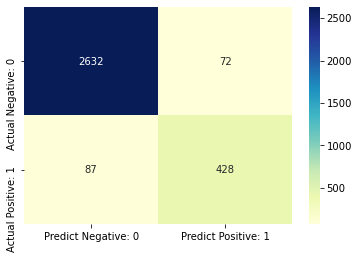

In [53]:
print('Resultados de Valores de TRAIN Gaussian Naive Bayes')
print()
evaluation(y_train, y_pred_GNB_train, y_pred_GNB_proba_train, verbose=1);

#### Gaussian Naive Bayes TEST

Resultados de Valores de TEST Gaussian Naive Bayes

Evaluation Metrics:
Accuracy:   0.9594882729211087
Recall:     0.8678414096916299
F1 Score:   0.8736141906873615
Precision:  0.8794642857142857
ROC_AUC:    0.9887291868886732

Confusion Matrix:
   TN   FP   FN   TP
[1153   27   30  197]



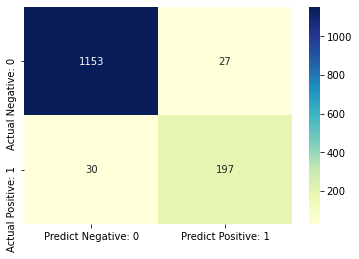

In [54]:
print('Resultados de Valores de TEST Gaussian Naive Bayes')
print()
evaluation(y_test, y_pred_GNB_test, y_pred_GNB_proba_test, verbose=1);

#### Logistic Regression TRAIN

Resultados de Valores de TRAIN Logistic Regression

Evaluation Metrics:
Accuracy:   0.9561975768872321
Recall:     0.8563106796116505
F1 Score:   0.8621700879765397
Precision:  0.8681102362204725
ROC_AUC:    0.9903314758430516

Confusion Matrix:
   TN   FP   FN   TP
[2637   67   74  441]



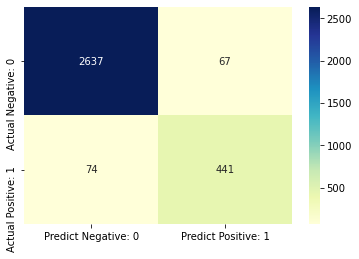

In [55]:
print('Resultados de Valores de TRAIN Logistic Regression')
print('')
evaluation(y_train, y_pred_log_train, y_pred_log_proba_train, verbose=1);

#### Logistic Regression TEST

Resultados de Valores de TEST Logistic Regression

Evaluation Metrics:
Accuracy:   0.9609097370291401
Recall:     0.8678414096916299
F1 Score:   0.8775055679287305
Precision:  0.8873873873873874
ROC_AUC:    0.9925520794444859

Confusion Matrix:
   TN   FP   FN   TP
[1155   25   30  197]



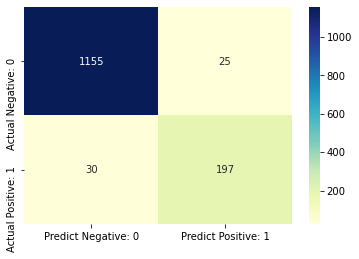

In [56]:
print('Resultados de Valores de TEST Logistic Regression')
print()
evaluation(y_test, y_pred_log_test, y_pred_log_proba_test, verbose=1);

#### Random Forest TRAIN

Resultados de Valores de TRAIN Random Forest

Evaluation Metrics:
Accuracy:   1.0
Recall:     1.0
F1 Score:   1.0
Precision:  1.0
ROC_AUC:    1.0

Confusion Matrix:
   TN   FP   FN   TP
[2704    0    0  515]



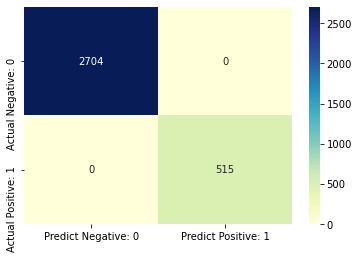

In [57]:
print('Resultados de Valores de TRAIN Random Forest')
print()
evaluation(y_train, y_pred_RFc_train, y_pred_RFc_proba_train, verbose=1);

#### Random Forest TEST

Resultados de Valores de TEST Random Forest

Evaluation Metrics:
Accuracy:   0.9964463397299218
Recall:     0.9955947136563876
F1 Score:   0.9890590809628009
Precision:  0.9826086956521739
ROC_AUC:    0.9925520794444859

Confusion Matrix:
   TN   FP   FN   TP
[1176    4    1  226]



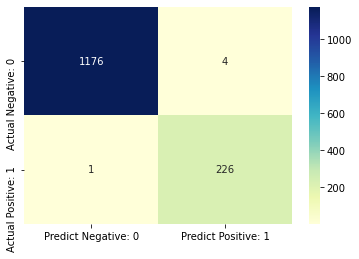

In [58]:
print('Resultados de Valores de TEST Random Forest')
print()
evaluation(y_test, y_pred_RFc_test, y_pred_log_proba_test, verbose=1);

### Resumen de Resultados

In [59]:
# Itera las opciones y genera una tabla de resumen

result = pd.DataFrame()
result = pd.DataFrame(columns=['Modelo', 'Data', 'Accuracy', 'Recall', 'F1_Score', 'Precision', 'ROC_AUC', 'TN', 'FP', 'FN', 'TP'])

for g in range(len(grids)):
    
    y_pred_test_g = grids[g].predict(X_test)
    y_pred_train_g = grids[g].predict(X_train)
    y_proba_test = grids[g].predict_proba(X_test)[:, 1]
    y_proba_train = grids[g].predict_proba(X_train)[:, 1]
        
    eval_test = evaluation(y_test, y_pred_test_g, y_proba_test, verbose=0)
    eval_train = evaluation(y_train, y_pred_train_g, y_proba_train, verbose=0)
    
    res = []
    res.append(grids[g].estimator)
    res.append('Test')
    for t in  eval_test:
        res.append(t)
    result.loc[len(result) + 1] = res
    
    res = []
    res.append(grids[g].estimator)
    res.append('Train')
    for t in  eval_train:
        res.append(t)
    result.loc[len(result) + 1] = res
    
result

,Modelo,Data,Accuracy,Recall,F1_Score,Precision,ROC_AUC,TN,FP,FN,TP
1,GaussianNB(),Test,0.959,0.868,0.874,0.879,0.989,1153,27,30,197
2,GaussianNB(),Train,0.951,0.831,0.843,0.856,0.985,2632,72,87,428
3,LogisticRegression(),Test,0.961,0.868,0.878,0.887,0.993,1155,25,30,197
4,LogisticRegression(),Train,0.956,0.856,0.862,0.868,0.990,2637,67,74,441
5,RandomForestClassifier(),Test,0.996,0.996,0.989,0.983,1.000,1176,4,1,226
6,RandomForestClassifier(),Train,1.000,1.000,1.000,1.000,1.000,2704,0,0,515


### Ajuste del umbral

#### Gaussian Naive Bayes

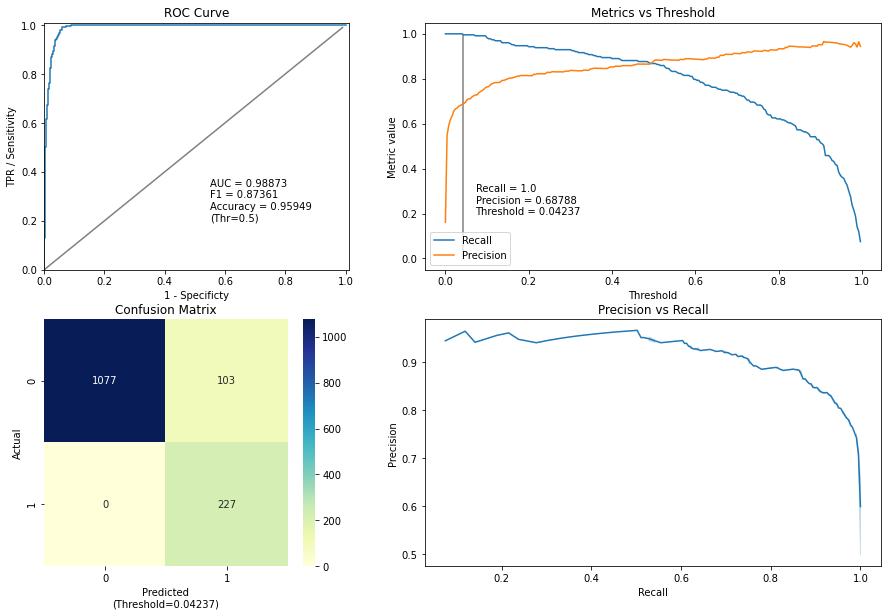

In [60]:
my.class_graph(y_test, y_pred_GNB_proba_test, recall=0.999)

#### Logistic Regression

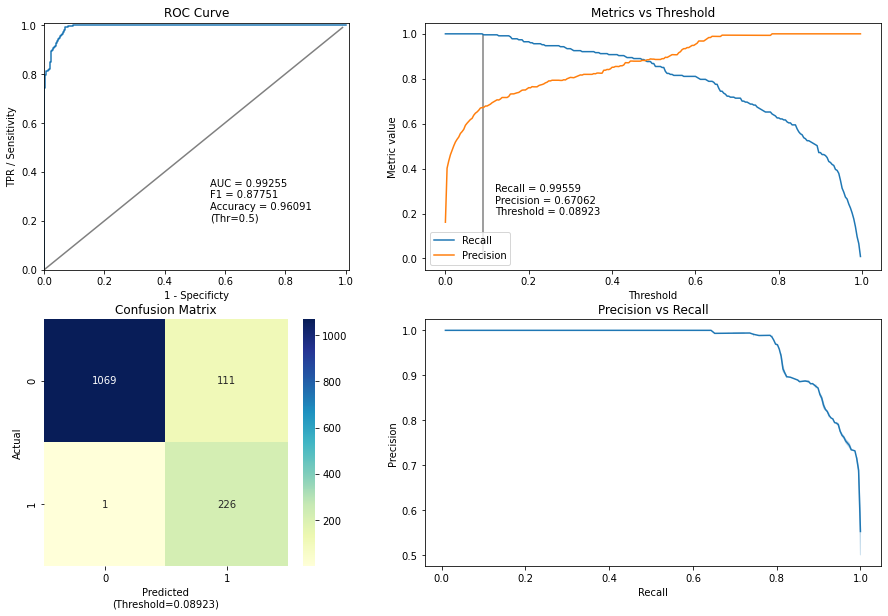

In [61]:
my.class_graph(y_test, y_pred_log_proba_test, recall=0.999)

#### Random Forest

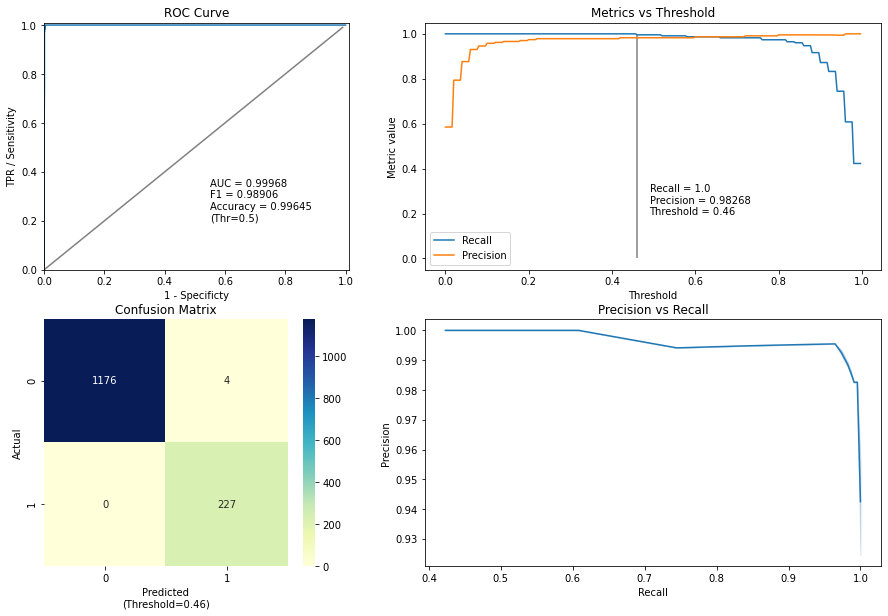

In [62]:
my.class_graph(y_test, y_pred_RFc_proba_test, recall=0.999)

---

## Extras (fuera de programa)

### Importancia de Features en Random Forest

In [63]:
# Importancia de Features
importances = grids[2].best_estimator_.feature_importances_
feature_list = list(X.columns)
feature_importance = sorted(zip(importances, feature_list), reverse=True)
dfi = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance = list(dfi['importance'])
feature = list(dfi['feature'])

print(dfi)

    importance                       feature
0     0.428858    Minimum Orbit Intersection
1     0.193344             Est Dia in M(max)
2     0.169361            Absolute Magnitude
3     0.071554           Perihelion Distance
4     0.045658            Orbit Uncertainity
5     0.022131                   Inclination
6     0.014882                  Eccentricity
7     0.014790        Miss Dist.(kilometers)
8     0.012826                Perihelion Arg
9     0.011041  Relative Velocity km per sec
10    0.010091                 Aphelion Dist
11    0.005463                  Mean Anomaly


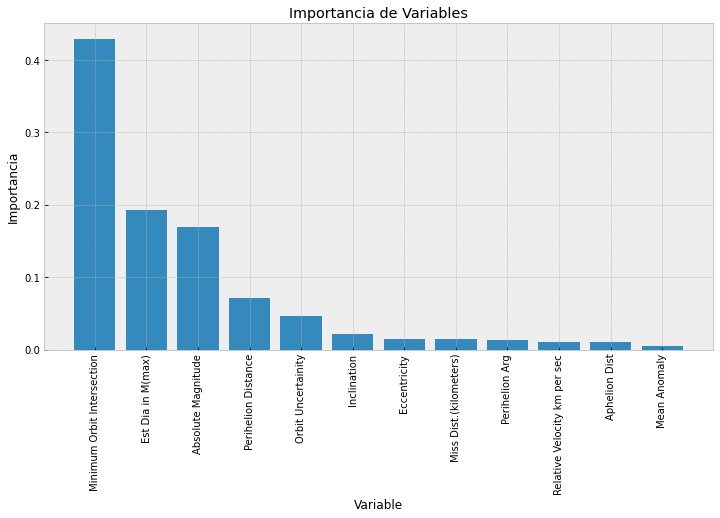

In [64]:
# Gráfico con la importancia de variables
x_values = list(range(len(feature_importance)))
plt.style.use('bmh')
plt.figure(figsize=(12, 6))
plt.bar(x_values, importance, orientation='vertical')
plt.xticks(x_values, feature, rotation='vertical')
plt.ylabel('Importancia')
plt.xlabel('Variable')
plt.title('Importancia de Variables');

### Análisis de features con Shapley para Random Forest

In [65]:
shap.initjs()

In [66]:
rf = grids[2].best_estimator_
print(rf)
explainer1 = shap.TreeExplainer(rf)
shap_values1 = explainer1.shap_values(X)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='entropy', n_estimators=50)


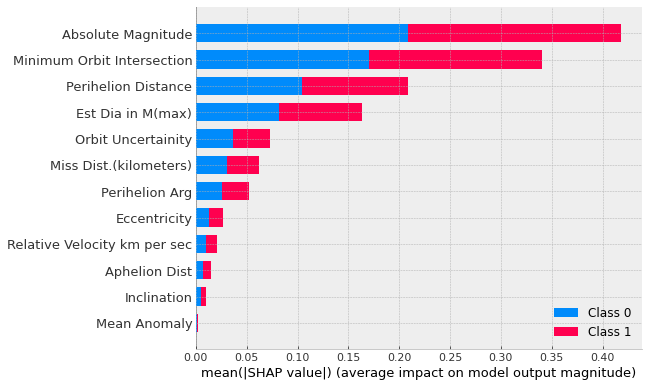

In [67]:
shap.summary_plot(shap_values1, features=X, feature_names=X.columns, plot_type='bar')

### Análisis de features con Shapley para Logistic Regression

In [68]:
logit = grids[1].best_estimator_
print(logit)

LogisticRegression(C=1, class_weight='none', max_iter=10000, penalty='l1',
                   solver='saga')


In [69]:
explainer = shap.Explainer(logit, X_train, feature_names=X.columns)
shap_values = explainer(X_test)

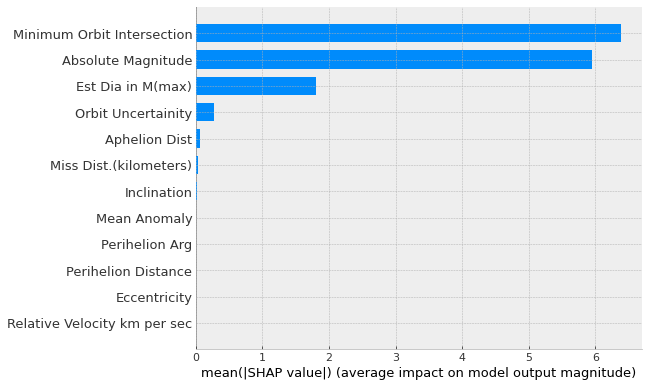

In [70]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns, plot_type='bar')

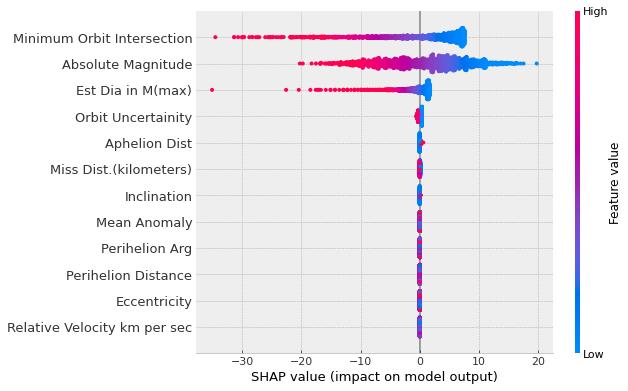

In [71]:
shap.plots.beeswarm(shap_values, max_display=20)

In [72]:
#ind = 1
#shap.plots.force(shap_values[ind])

### Coeficientes (Betas) de la Logistic Regression

In [73]:
logit = grids[1].best_estimator_
beta1 = []
beta = logit.coef_
for t in beta[0]:
    beta1.append(t)
    
beta2 = np.array(beta1)
features = np.array(X.columns)

dfl = pd.DataFrame(np.array(beta2),features)
dfl.reset_index(inplace=True)
dfl.rename(columns={'index': 'feature', 0: 'coef'}, inplace=True)
dfl.sort_values('coef')

,feature,coef
5,Minimum Orbit Intersection,-44.080324
0,Absolute Magnitude,-37.485321
1,Est Dia in M(max),-12.749845
4,Orbit Uncertainity,-0.852942
3,Miss Dist.(kilometers),-0.104118
2,Relative Velocity km per sec,0.000000
6,Eccentricity,0.000000
8,Perihelion Distance,0.000000
9,Perihelion Arg,0.000000
11,Mean Anomaly,0.000000


---

## Esto es todo.
## ¡MUCHAS GRACIAS!

<br>
<div>
    <h5 align='left'>Falso Negativo:</h5>
    <img src="impacto-asteroide.jpg" alt="Falso Negativo"/>
</div>